In [35]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
import seaborn as sns
from scipy.integrate import odeint

## Homework6
### Eugeniu Vezeteu - 886240

## a) Solve the equation analytically.

We have $\frac{dx}{dt} = f*x$.

1)Separate variables  $\frac{dx}{x} = f*dt$, 
    
2)Integrate  $\int \frac{dx}{x} = \int f*dt$ result $ln|x| = f*t + constant$
    
3)Take the exponential  $x = e^{constant} * e^{f*t}$ 


We have $f = -\frac{1}{2}$ and $x_0 = 3$, so at $t=0$ we have $$ x(0) = e^{constant} * e^{-0.5*0} $$  
result in
$$ 3 = e^{constant} * e^{0} $$  
$ e^{constant} $ is 3.

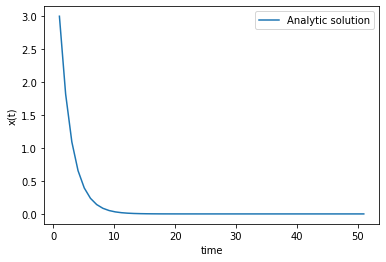

In [40]:
f -.5
x_0 = 3.

c = x_0
t = np.linspace(1,51)

x_analytic = np.zeros((t.shape[0],1))
x_analytic[0] = x_0
for i in range(1,t.shape[0]):
    x_analytic[i] = c*np.exp(f*t[i-1]) 

x_sol_analytic = x_analytic 
    
plt.plot(t,x_sol_analytic, label='Analytic solution')
plt.xlabel('time')
plt.ylabel('x(t)')
plt.legend()
plt.show()

## b) Euler’s method

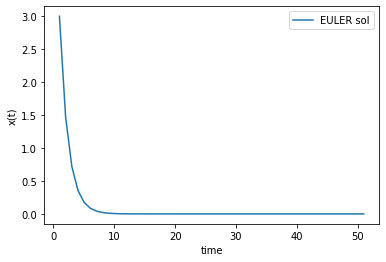

In [41]:
f = -1/2
x0 = 3 # initial condition

t = np.linspace(1,51)
dt = t[1]-t[0]
# function that returns dx/dt
def model(x,t):
    dxdt = f*x
    return dxdt

def euler(f, t_now, x_now, dt):
    return x_now + f(x_now,t_now)*dt

def euler_propagate(f, t, x_init, u, dt):
    x_res = np.zeros((u.shape[0],1))
    x_res[0] = x_init
    for i in range(x_res.shape[0]-1):
        x_res[i+1] = euler(f, t[i], x_res[i], dt)
    return x_res

B_u = np.array([0.])
u_0 = np.zeros(t.shape)

x_sol_EULER = euler_propagate(model, t, x0, u_0, dt)

plt.plot(t,x_sol_EULER, label="EULER sol")
plt.xlabel('time')
plt.ylabel('x(t)')
plt.legend()
plt.show()


## C) solve with builtin ODE solver

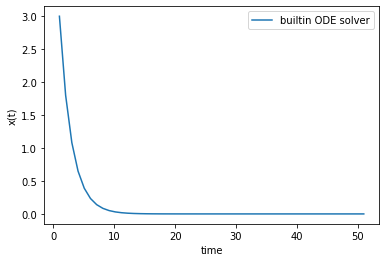

In [42]:
# solve ODE
x_sol_ODE = odeint(model,x0,t)

plt.plot(t,x_sol_ODE, label="builtin ODE solver")
plt.xlabel('time')
plt.ylabel('x(t)')
plt.legend()
plt.show()

## d)Visualize and compare

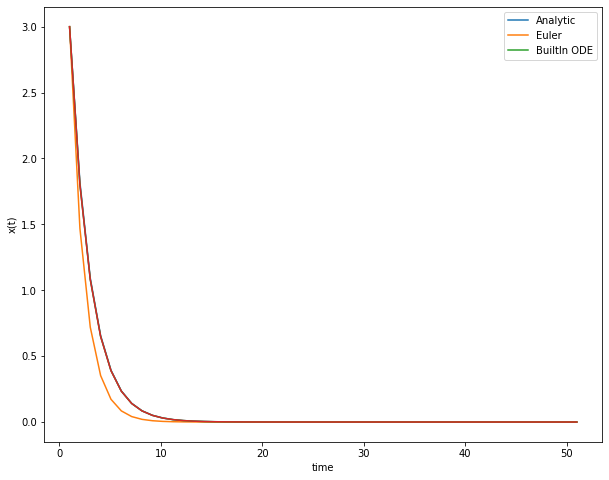

In [43]:
plt.figure(figsize=(10,8))

plt.plot(t,x_sol_analytic, label='Analytic')
plt.plot(t,x_sol_EULER, label='Euler')
plt.plot(t,x_sol_ODE, label='BuiltIn ODE')

plt.plot(t,x_sol_ODE)
plt.xlabel('time')
plt.ylabel('x(t)')
plt.legend()
plt.show()

We notice that builtin ODE solution and Analytic solution are the same